In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import *
from IPython.display import display, HTML
from sklearn.metrics import *

from Util import *
%matplotlib inline

In [2]:
user_rating_data = pd.read_table('data/u.data.txt',na_values=['?'],delimiter="\t",header=None )
genre_data = pd.read_table('data/u.genre.txt',na_values=['?'],delimiter="\t",header=None)
info_data = pd.read_table('data/u.info.txt',na_values=['?'],delimiter="\t",header=None)
item_data = pd.read_table('data/u.item.txt',na_values=['?'],delimiter="\t",header=None,encoding='latin-1')
occupation_data = pd.read_table('data/u.occupation.txt',na_values=['?'],delimiter="\t",header=None)
user_data = pd.read_table('data/u.user.txt',na_values=['?'],delimiter="\t",header=None)

In [3]:
user_rating_data.columns = ['user_id','item_id','rating','timestamp']
user_rating_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
genre_data.columns=['Genre','Id']
genre_data.head()

,Genre,Id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [5]:
info_data

,0
0,943 users
1,1682 items
2,100000 ratings


In [6]:
item_data.columns = ['movie_id','movie_title','release_date','video_release_date','IMDb_URL','unknown','Action','Adventure','Animation','Children\'s','Comedy','Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']
item_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
movie_data = item_data[['movie_id','movie_title']]
movie_data.head()

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [8]:
occupation_data

,0
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


In [9]:
user_data.columns= ['user_id','age','gender','occupation','zip code']
user_data.head()

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [10]:
user_rating_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [11]:
item_data.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
user_rating_data.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [13]:
item_data.shape

(1682, 24)

In [14]:
user_rating_data.shape

(100000, 4)

In [15]:
## check if any missing data in user data
print('Number of missing values across columns: \n',user_data.isnull().sum())

Number of missing values across columns: 
 user_id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


In [16]:
## get the column with missing values
user_data.columns[user_data.isna().any()]

Index([], dtype='object')

In [17]:
user_data

,user_id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [18]:
item_data.columns

Index(['movie_id', 'movie_title', 'release_date', 'video_release_date',
       'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [19]:
user_data.columns


Index(['user_id', 'age', 'gender', 'occupation', 'zip code'], dtype='object')

In [20]:
age_discreet = pd.qcut(user_data.age,3, labels=['young', 'mid-age','old'])
age_discreet


0        young
1          old
2        young
3        young
4      mid-age
        ...   
938      young
939    mid-age
940      young
941        old
942      young
Name: age, Length: 943, dtype: category
Categories (3, object): [young < mid-age < old]

In [21]:
user_data['age_discreet'] = age_discreet
# user_data = user_data.groupby('age_discreet')
# user_data

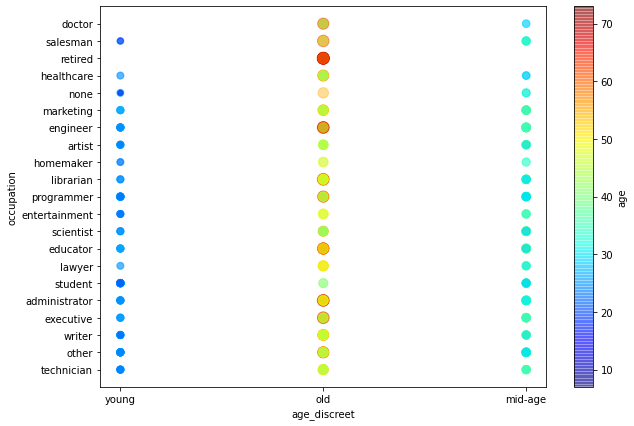

In [22]:
fig, ax = plt.subplots()
user_data.plot(y='occupation', x='age_discreet',kind='scatter',s=user_data.age*2, alpha=0.4,c="age", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7),ax=ax)

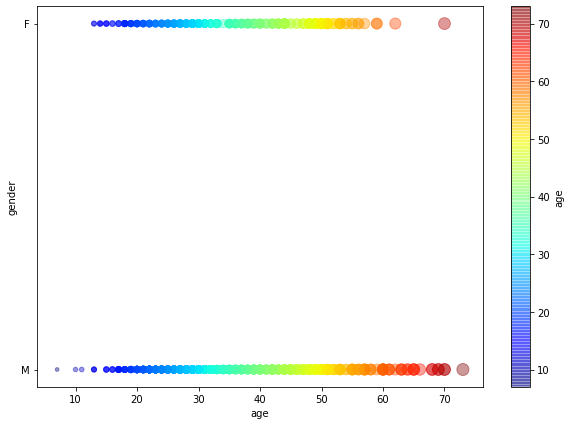

In [23]:
fig, ax = plt.subplots()
user_data.plot(y='gender', x='age',kind='scatter',s=user_data.age*2, alpha=0.4,c="age", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7),ax=ax)

In [24]:
user_data

,user_id,age,gender,occupation,zip code,age_discreet
0,1,24,M,technician,85711,young
1,2,53,F,other,94043,old
2,3,23,M,writer,32067,young
3,4,24,M,technician,43537,young
4,5,33,F,other,15213,mid-age
...,...,...,...,...,...,...
938,939,26,F,student,33319,young
939,940,32,M,administrator,02215,mid-age
940,941,20,M,student,97229,young
941,942,48,F,librarian,78209,old


 ## Analyze User Rating Data

In [25]:
#Five point summary 

user_rating_data.describe()['rating']

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [26]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(user_rating_data.rating.min()))
print('Maximum rating is: %d' %(user_rating_data.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [27]:
#Check for missing values
print('Number of missing values across columns: \n',user_rating_data.isnull().sum())

Number of missing values across columns: 
 user_id      0
item_id      0
rating       0
timestamp    0
dtype: int64


M:\apps\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


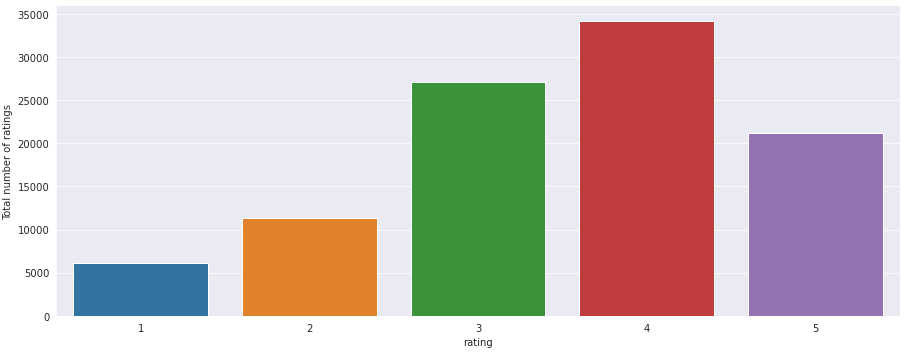

In [28]:
import seaborn as sns
# Check the distribution of the rating
with sns.axes_style('darkgrid'):
    g = sns.factorplot("rating", data=user_rating_data, aspect=2.5,kind='count')
    g.set_ylabels("Total number of ratings")

In [29]:
print("Total data ")
print("-"*40)
print("\nTotal no of ratings :",user_rating_data.shape[0])
print("Total No of Users   :", len(np.unique(user_rating_data.user_id)))
print("Total No of Movies  :", len(np.unique(user_rating_data.item_id)))

Total data 
----------------------------------------

Total no of ratings : 100000
Total No of Users   : 943
Total No of Movies  : 1682


In [30]:
#Dropping the Timestamp column

user_rating_data.drop(['timestamp'], axis=1,inplace=True)

In [31]:
#Analysis of rating given by the user 

no_of_rated_movies_per_user = user_rating_data.groupby(by='user_id')['rating'].count().sort_values(ascending=False)

no_of_rated_movies_per_user.head()

user_id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

In [32]:
no_of_rated_movies_per_user.describe()

count    943.000000
mean     106.044539
std      100.931743
min       20.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      737.000000
Name: rating, dtype: float64

In [33]:
min_rating_count = no_of_rated_movies_per_user.min()
print(' min_rating_count ',min_rating_count)

 min_rating_count  20


In [34]:
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

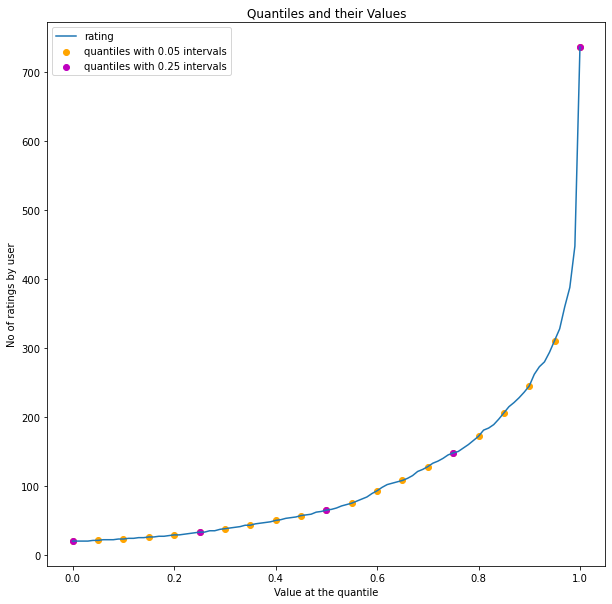

In [35]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [36]:
print('\n No of rated movies more than {} per user : {}\n'.format(min_rating_count, sum(no_of_rated_movies_per_user >= min_rating_count)) )


 No of rated movies more than 20 per user : 943



 ## Merge the user and user rating data to prepare the final data set

In [37]:

## merge movie and movie rating data
merged_df = item_data.merge(user_rating_data, how = 'inner', left_on=['movie_id'], right_on=['item_id'])
display(merged_df.head())

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,user_id,item_id,rating
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,308,1,4
1,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,287,1,5
2,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,148,1,4
3,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,280,1,4
4,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,66,1,3


In [38]:
user_data

,user_id,age,gender,occupation,zip code,age_discreet
0,1,24,M,technician,85711,young
1,2,53,F,other,94043,old
2,3,23,M,writer,32067,young
3,4,24,M,technician,43537,young
4,5,33,F,other,15213,mid-age
...,...,...,...,...,...,...
938,939,26,F,student,33319,young
939,940,32,M,administrator,02215,mid-age
940,941,20,M,student,97229,young
941,942,48,F,librarian,78209,old


In [39]:
## merge the user info
merged_df = merged_df.merge(user_data, how = 'inner', on=['user_id'])
merged_df.head()

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,War,Western,user_id,item_id,rating,age,gender,occupation,zip code,age_discreet
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,308,1,4,60,M,retired,95076,old
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,308,4,5,60,M,retired,95076,old
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,308,5,4,60,M,retired,95076,old
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,308,7,4,60,M,retired,95076,old
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,308,8,5,60,M,retired,95076,old


In [40]:

print("Merged DaraFrame  - Shape ",merged_df.shape," \n\ncolumns ",merged_df.columns)

Merged DaraFrame  - Shape  (100000, 32)  

columns  Index(['movie_id', 'movie_title', 'release_date', 'video_release_date',
       'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'user_id', 'item_id', 'rating', 'age', 'gender',
       'occupation', 'zip code', 'age_discreet'],
      dtype='object')


In [41]:
## dropping uneccessary columns
final_dataset = merged_df.drop(columns=['release_date','video_release_date','IMDb_URL','item_id'])

In [42]:
## rename movie_id to item_id
updated_columnsNames = ['item_id', 'movie_title', 'unknown', 'Action', 'Adventure',
       'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'user_id', 'rating', 'age',
       'gender', 'occupation', 'zip code', 'age_discreet']
final_dataset.columns = updated_columnsNames
print("\n final data set Shape ",final_dataset.shape," \n\ncolumns ",final_dataset.columns)


 final data set Shape  (100000, 28)  

columns  Index(['item_id', 'movie_title', 'unknown', 'Action', 'Adventure', 'Animation',
       'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'user_id', 'rating', 'age', 'gender',
       'occupation', 'zip code', 'age_discreet'],
      dtype='object')


## Popularity Based Recommendation¶
#### Popularity based recommendation system works with the trend. It basically uses the movies which are in trend right now. For example, if any movie which is usually watched by every new user then there are chances that it may suggest that movie to the test user.

#### The problems with popularity based recommendation system is that the personalization is not available with this method i.e. even though you know the behaviour of the user you cannot recommend movies accordingly.

In [43]:
print("Unique movie counts ",len(np.unique(final_dataset['item_id'])))

Unique movie counts  1682


In [44]:
#Getting the new dataframe which contains users who has given more than the 5 ratings

new_df=final_dataset.groupby("item_id").filter(lambda x:x['rating'].count() >=5)
print(new_df.shape)
print("Unique movie counts ",len(np.unique(new_df['item_id'])))

(99287, 28)
Unique movie counts  1349


In [45]:
no_of_ratings_per_movie = new_df.groupby(by='item_id')['rating'].count().sort_values(ascending=False)
print(no_of_ratings_per_movie)

item_id
50      583
258     509
100     508
181     507
294     485
       ... 
1333      5
439       5
1324      5
1138      5
1397      5
Name: rating, Length: 1349, dtype: int64


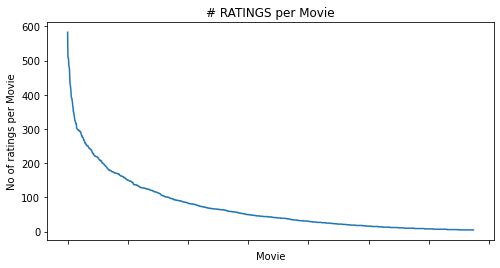

In [46]:
## plot number of ratings per movie
fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Movie')
plt.xlabel('Movie')
plt.ylabel('No of ratings per Movie')
ax.set_xticklabels([])

plt.show()

In [47]:
#Average rating of the movie (sorting in descending order)
new_df.groupby('item_id')['rating'].mean().sort_values(ascending=False).head()

item_id
1449    4.625000
408     4.491071
318     4.466443
169     4.466102
483     4.456790
Name: rating, dtype: float64

In [48]:
#Total no of rating for movie  (sorting in descending order)

new_df.groupby('item_id')['rating'].count().sort_values(ascending=False).head()

item_id
50     583
258    509
100    508
181    507
294    485
Name: rating, dtype: int64

In [49]:
ratings_mean_count = pd.DataFrame(new_df.groupby('item_id')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('item_id')['rating'].count())
ratings_mean_count.head()

,rating,rating_counts
item_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


In [50]:
ratings_mean_count.shape

(1349, 2)

In [51]:
print("Max # of ratings ",ratings_mean_count['rating_counts'].max())

Max # of ratings  583


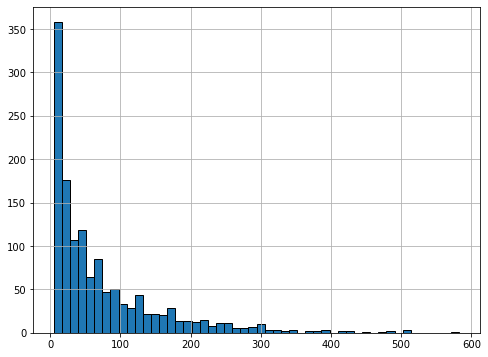

In [52]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

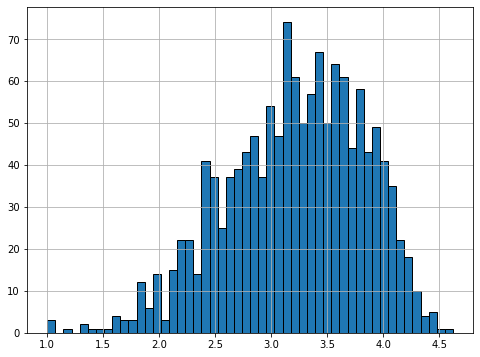

In [53]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

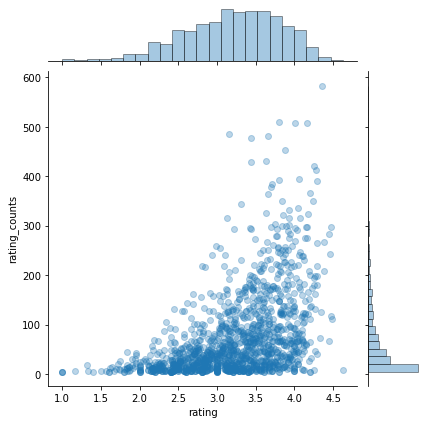

In [54]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='rating', y='rating_counts', data=ratings_mean_count, alpha=0.3)

### TOP 30 popular movies

top  30  movies are 

     item_id                                    movie_name  No_of_ratings
0        50                              Star Wars (1977)            583
1       258                                Contact (1997)            509
2       100                                  Fargo (1996)            508
3       181                     Return of the Jedi (1983)            507
4       294                              Liar Liar (1997)            485
5       286                   English Patient, The (1996)            481
6       288                                 Scream (1996)            478
7         1                              Toy Story (1995)            452
8       300                          Air Force One (1997)            431
9       121                 Independence Day (ID4) (1996)            429
10      174                Raiders of the Lost Ark (1981)            420
11      127                         Godfather, The (1972)            413
12       56                 

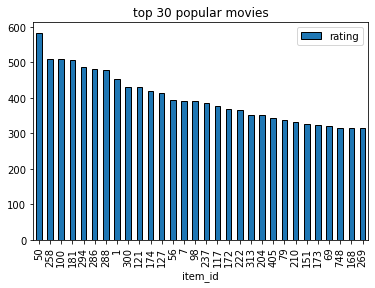

In [55]:
%%time
top_k = 30
movies = []


popular_movies = pd.DataFrame(new_df.groupby('item_id')['rating'].count())
most_popular = popular_movies.sort_values('rating', ascending=False)
most_popular.head


movie_id = most_popular.index
rating = np.array(pd.DataFrame(most_popular['rating']))
for i in range(len(movie_id)):
    #print(np.array(movie_data.loc[movie_data['movie_id']== movie_id[i]]['movie_title']))
    movies.append(np.array(movie_data.loc[movie_data['movie_id']== movie_id[i]]['movie_title'])[0])

top_popular_movies = pd.DataFrame(most_popular.index)
top_popular_movies['movie_name'] = movies
top_popular_movies['No_of_ratings'] = rating

most_popular.head(top_k).plot(kind = "bar",title="top "+str(top_k)+" popular movies")


print("top ",top_k," movies are \n\n",top_popular_movies.head(top_k))


## Collaberative filtering (Item-Item recommedation)¶
#### Collaborative filtering is commonly used for recommender systems. These techniques aim to fill in the missing entries of a user-item association matrix. We are going to use collaborative filtering (CF) approach. CF is based on the idea that the best recommendations come from people who have similar tastes. In other words, it uses historical item ratings of like-minded people to predict how someone would rate an item.Collaborative filtering has two sub-categories that are generally called memory based and model-based approaches.

## 80-20 Data Split

In [56]:
not_needed_columns = ['movie_title','age_discreet','zip code']

final_data = final_dataset.drop(columns=not_needed_columns,inplace=False)
## handle categorical data
final_data = pd.get_dummies(final_data)

rating_class = final_data['rating']
vs_matrix = final_data.drop(['rating'],axis=1)
#vs_matrix = final_data.copy()


vs_train, vs_test, vs_target_train, vs_target_test = train_test_split(vs_matrix,rating_class, test_size=0.2, random_state=33)


In [57]:
vs_train.columns

Index(['item_id', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'user_id', 'age', 'gender_F', 'gender_M',
       'occupation_administrator', 'occupation_artist', 'occupation_doctor',
       'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer'],
      dtype='object')

In [58]:
vs_train.describe(include='all')


,item_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,...,occupation_marketing,occupation_none,occupation_other,occupation_programmer,occupation_retired,occupation_salesman,occupation_scientist,occupation_student,occupation_technician,occupation_writer
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,...,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,426.010038,0.000112,0.256862,0.136875,0.036038,0.071887,0.297837,0.080463,0.007625,0.398863,...,0.019075,0.008887,0.107000,0.078075,0.015887,0.008700,0.020438,0.220500,0.035213,0.055525
std,330.692439,0.010606,0.436906,0.343717,0.186385,0.258303,0.457311,0.272010,0.086988,0.489667,...,0.136790,0.093854,0.309115,0.268291,0.125041,0.092868,0.141492,0.414586,0.184318,0.229004
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,322.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,632.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
data = vs_train
data.shape[1]

45

In [60]:
%%time

from sklearn.cluster import KMeans
wcss = []
k_range =20
for i in range(1, k_range):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


Wall time: 2min 26s


In [61]:
pd.DataFrame(wcss).shape

(19, 1)

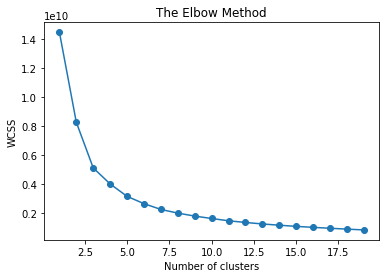

In [62]:
plt.plot(range(1, k_range), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [64]:
%%time

from sklearn.cluster import KMeans
culster_count = 8
wcss = []
for i in range(1, culster_count):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)


Wall time: 17.1 s


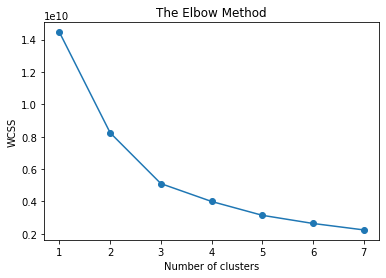

In [65]:
plt.plot(range(1, culster_count), wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

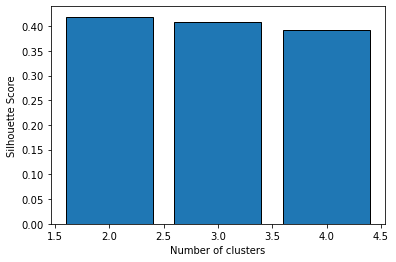

Wall time: 4min 29s


In [66]:
%%time

silhouette_scores = [] 

data_matrix = np.mat(data);

for n_cluster in range(2, 5):
    silhouette_scores.append( 
        silhouette_score(data_matrix, KMeans(n_clusters = n_cluster).fit_predict(data_matrix))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

## K-Means and Item Based Predictions

In [95]:
## from above we can say the # of cluster= 3 seems to be the elbow of the plot.
## however, using K=5 as the class variable has 5 unique values (1-5)
n_clusters = 2
kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
clusters = kmeans.fit_predict(data)
clusters

array([0, 0, 0, ..., 0, 1, 1])

In [96]:
 kmeans.cluster_centers_

array([[2.43040372e+02, 1.43161361e-04, 2.88058553e-01, 1.56010093e-01,
        3.85461964e-02, 7.46765448e-02, 2.97202985e-01, 9.44149174e-02,
        3.63271953e-03, 3.96109590e-01, 1.22581915e-02, 1.39403375e-02,
        5.35244537e-02, 5.43834219e-02, 5.64055761e-02, 1.90726723e-01,
        1.60143877e-01, 2.10339829e-01, 1.15763855e-01, 1.91657272e-02,
        4.61910846e+02, 3.31628460e+01, 2.49369195e-01, 7.50630805e-01,
        7.74145058e-02, 2.39437376e-02, 5.56539790e-03, 9.53633614e-02,
        8.48231062e-02, 1.98815340e-02, 3.31955405e-02, 2.21721157e-02,
        2.93480790e-03, 1.31171597e-02, 5.29518083e-02, 2.06152359e-02,
        8.17809273e-03, 1.08122618e-01, 7.95261359e-02, 1.53719511e-02,
        8.69705267e-03, 2.27984467e-02, 2.14885202e-01, 3.68282601e-02,
        5.36139296e-02],
       [8.49930097e+02, 4.14610888e-05, 1.84584767e-01, 9.25411501e-02,
        3.02251337e-02, 6.54255981e-02, 2.99307600e-01, 4.81363241e-02,
        1.68746631e-02, 4.05240682e-01,

In [97]:
data.columns

Index(['item_id', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War',
       'Western', 'user_id', 'age', 'gender_F', 'gender_M',
       'occupation_administrator', 'occupation_artist', 'occupation_doctor',
       'occupation_educator', 'occupation_engineer',
       'occupation_entertainment', 'occupation_executive',
       'occupation_healthcare', 'occupation_homemaker', 'occupation_lawyer',
       'occupation_librarian', 'occupation_marketing', 'occupation_none',
       'occupation_other', 'occupation_programmer', 'occupation_retired',
       'occupation_salesman', 'occupation_scientist', 'occupation_student',
       'occupation_technician', 'occupation_writer'],
      dtype='object')

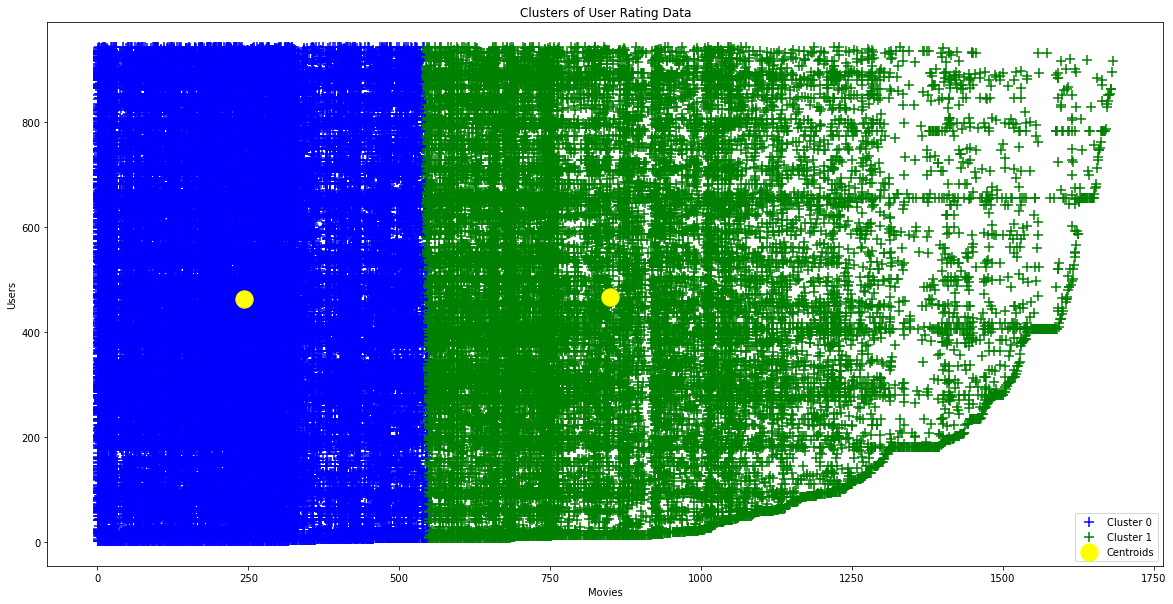

In [98]:
X = np.array(data)

plt.figure(figsize=(20,10))
colour=['blue','green','red','orange','cyan','black','pink','magenta']
for i in range(n_clusters):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 20], s = 100, color=colour[i], marker='+', label = 'Cluster '+str(i))
    
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 20], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of User Rating Data')
plt.xlabel('Movies')
plt.ylabel('Users')
plt.legend()
plt.show()

In [99]:
test_data = np.mat(vs_test)
test_data.shape

(20000, 45)

In [100]:
data.shape

(80000, 45)

In [101]:
## Predict Y
y_pred_test = kmeans.predict(test_data)

In [102]:
np.unique(y_pred_test)

array([0, 1])

In [103]:
y_pred_test

array([1, 0, 0, ..., 1, 0, 0])

In [104]:
y_pred_test.shape

(20000,)

In [105]:
vs_target_test.shape

(20000,)

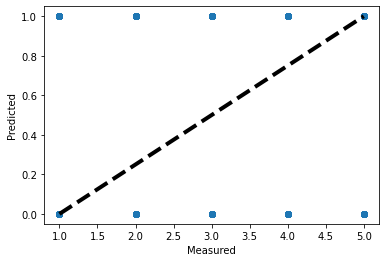

In [106]:
## not needed
fig, ax = plt.subplots()
ax.scatter(vs_target_test, y_pred_test)
ax.plot([vs_target_test.min(), vs_target_test.max()], [y_pred_test.min(), y_pred_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


In [107]:
## Evaluate Clusters using Silhouetes

In [108]:
%%time


silhouettes = silhouette_samples(data,clusters)

Wall time: 1min 33s


In [109]:
%%time

## silhouettes mean
sl_mean = silhouettes.mean()
print(" silhouettes.mean : ",sl_mean)

 silhouettes.mean :  0.41892212317507527
Wall time: 0 ns


In [110]:
%%time

## plot the silhouette
import pylab as pl

def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

Wall time: 11 ms


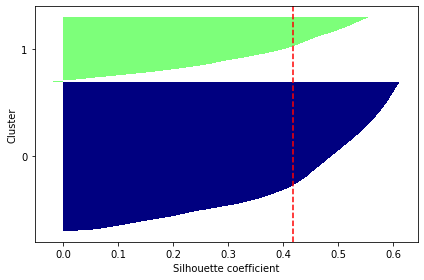

Wall time: 3min 49s


In [111]:
%%time
plot_silhouettes(data,clusters)

 ## Next, compare the clusters to the pre-assigned classes by computing the Completeness and Homogeneity values of the generated clusters

In [112]:
rating_class

0        4
1        5
2        4
3        4
4        5
        ..
99995    4
99996    3
99997    3
99998    1
99999    1
Name: rating, Length: 100000, dtype: int64

In [113]:
from sklearn.metrics import completeness_score, homogeneity_score
classes_arr = np.array(vs_target_train)
print(" classes_arr : ",classes_arr)
print(" clusters    : ",clusters)
print(" unique clusters - ",np.unique(clusters))
print(" unique ratings - ",np.unique(vs_target_train))

print("completeness_score : ",completeness_score(classes_arr,clusters))
print("homogeneity_score : ",homogeneity_score(classes_arr,clusters))

 classes_arr :  [4 4 4 ... 5 3 2]
 clusters    :  [0 0 0 ... 0 1 1]
 unique clusters -  [0 1]
 unique ratings -  [1 2 3 4 5]
completeness_score :  0.024059319807367033
homogeneity_score :  0.010027426196282309


In [114]:

def calculateCosineSimilarityDistance(x,D):
    
    D_norm = np.linalg.norm(D) #np.array([np.linalg.norm(D[i]) for i in range(len(D))])
    x_norm = np.linalg.norm(x)
    #print("D_norm ",D_norm," x_norm ",x_norm)
    sims = np.dot(D,x)/(D_norm * x_norm)
    # The distance measure will be the inverse of Cosine similarity
    dist = 1 - sims
    
    return dist

In [115]:
# test_data = vs_test.drop(columns=not_needed_columns,inplace=False)
# test_data = pd.get_dummies(test_data)
test_data

matrix([[744,   0,   0, ...,   0,   0,   0],
        [315,   0,   0, ...,   0,   0,   0],
        [537,   0,   0, ...,   1,   0,   0],
        ...,
        [944,   0,   0, ...,   1,   0,   0],
        [117,   0,   1, ...,   1,   0,   0],
        [258,   0,   0, ...,   1,   0,   0]], dtype=int64)

In [116]:
#test_data.values

In [117]:
centroids =  kmeans.cluster_centers_
print(" centroids ",centroids)
print(" kmeans Score ",kmeans.score)

 centroids  [[2.43040372e+02 1.43161361e-04 2.88058553e-01 1.56010093e-01
  3.85461964e-02 7.46765448e-02 2.97202985e-01 9.44149174e-02
  3.63271953e-03 3.96109590e-01 1.22581915e-02 1.39403375e-02
  5.35244537e-02 5.43834219e-02 5.64055761e-02 1.90726723e-01
  1.60143877e-01 2.10339829e-01 1.15763855e-01 1.91657272e-02
  4.61910846e+02 3.31628460e+01 2.49369195e-01 7.50630805e-01
  7.74145058e-02 2.39437376e-02 5.56539790e-03 9.53633614e-02
  8.48231062e-02 1.98815340e-02 3.31955405e-02 2.21721157e-02
  2.93480790e-03 1.31171597e-02 5.29518083e-02 2.06152359e-02
  8.17809273e-03 1.08122618e-01 7.95261359e-02 1.53719511e-02
  8.69705267e-03 2.27984467e-02 2.14885202e-01 3.68282601e-02
  5.36139296e-02]
 [8.49930097e+02 4.14610888e-05 1.84584767e-01 9.25411501e-02
  3.02251337e-02 6.54255981e-02 2.99307600e-01 4.81363241e-02
  1.68746631e-02 4.05240682e-01 1.67502799e-02 2.44620424e-02
  5.34433434e-02 3.94294954e-02 4.34097599e-02 1.96442639e-01
  5.08727559e-02 2.41676686e-01 4.200008

In [118]:
%%time

## check the clusters the test data set belongs to

results = []

#vs_test = np.array(test_data.values)
vs_test = np.array(test_data)
for doc in vs_test:
    dic = {}
    sim = []
    cluster = 0
    for centroid in centroids:
        #print("d ",doc)
        val = np.ravel(calculateCosineSimilarityDistance(doc,centroid))[0]
        #print("val ",val)
        centroid_doc_sim = 1 - val #Need to subtract from 1 as our function returns distance and not similarity
        #print("centroid_doc_sim ",centroid_doc_sim)
        sim.append(centroid_doc_sim) 
        dic['Cosine Similarity to Cluster '+str(cluster + 1)] = str(np.ravel(centroid_doc_sim)[0])
        cluster += 1
        
    dic['Predicted Cluster'] = sim.index(max(sim))  + 1
    
    results.append(dic)

test_cluster = pd.DataFrame(results)

pd.options.display.max_rows = 500
print("Categorized test data shape ",test_cluster.shape)

test_cluster

Categorized test data shape  (20000, 3)
Wall time: 1.09 s


,Cosine Similarity to Cluster 1,Cosine Similarity to Cluster 2,Predicted Cluster
0,0.9283275616897432,0.9791954362390205,2
1,0.7364525290713987,0.985744596234056,2
2,0.9161094901743237,0.9851278363734669,2
3,0.991472085869864,0.7670318469706978,1
4,0.990621140473054,0.8967046476856638,1
...,...,...,...
19995,0.9504732180494347,0.6216062711487841,1
19996,0.9993323279463618,0.8149143646002907,1
19997,0.8818197502075537,0.995252614423564,2
19998,0.9524894315632998,0.6267921318824878,1


In [119]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(vs_target_test, y_pred_test))

In [120]:
rms

3.4897206191900234

In [121]:
from sklearn.metrics import accuracy_score
print(accuracy_score(vs_target_test, y_pred_test) * 100)

2.8049999999999997


## User Based CF

In [122]:
## Item Based Recommendation
movies = movie_data
movies

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [123]:
#Function to get the rating given by a user to a movie.
def get_rating_(ratings,userid,movieid):
    return (ratings.loc[(ratings.user_id==userid) & (ratings.item_id == movieid),'rating'].iloc[0])

# Function to get the list of all movie ids the specified user has rated.
def get_movieids_(ratings,userid):
    return (ratings.loc[(ratings.user_id==userid),'item_id'].tolist())

# Function to get the movie titles against the movie id.
def get_movie_title_(movieid):
    return (movies.loc[(movies.movie_id == movieid),'movie_title'].iloc[0])

def get_movie_genre_(movie_id):
    g = np.array(genre_data['Genre'])
    data_g= item_data.loc[item_data.movie_id==movie_id]
    gen = "";
    for i in range(len(g)):
        if(data_g[g[i]].iloc[0] == 1):
            if(len(gen) == 0):
                gen =g[i]
            else:
                gen +=" | "+g[i] 
    return gen

In [124]:
def distance_similarity_score(ratings, user1,user2):
    '''
    user1 & user2 : user ids of two users between which similarity score is to be calculated.
    '''
    both_watch_count = 0
    for element in ratings.loc[ratings.user_id==user1,'item_id'].tolist():
        if element in ratings.loc[ratings.user_id==user2,'item_id'].tolist():
            both_watch_count += 1
            
    if both_watch_count == 0 :
        return 0
    distance = []
    for element in ratings.loc[ratings.user_id==user1,'item_id'].tolist():
        if element in ratings.loc[ratings.user_id==user2,'item_id'].tolist():
            rating1 = get_rating_(ratings,user1,element)
            #print(rating1)
            rating2 = get_rating_(ratings,user2,element)
            distance.append(pow(rating1 - rating2, 2))
    total_distance = sum(distance)
    return 1/(1+sqrt(total_distance))

In [130]:
distance_similarity_score(user_rating_data,1,250)

0.08179977728257459

### Calculating Similarity Scores based on the distances have an inherent problem. We do not have a threshold to decide how much more distance between two users is to be considered for calculating whether the users are close enough or far enough. On the other side, this problem is resolved by pearson correlation method as it always returns a value between -1 & 1 which clearly provides us with the boundaries for closeness as we prefer.

In [131]:
def pearson_correlation_score(ratings,user1,user2):
    '''
    user1 & user2 : user ids of two users between which similarity score is to be calculated.
    '''
    both_watch_count = []
    for element in ratings.loc[ratings.user_id==user1,'item_id'].tolist():
        if element in ratings.loc[ratings.user_id==user2,'item_id'].tolist():
            both_watch_count.append(element)
    if len(both_watch_count) == 0 :
        return 0
   
    rating_sum_1 = sum([get_rating_(ratings,user1,element) for element in both_watch_count])
    rating_sum_2 = sum([get_rating_(ratings,user2,element) for element in both_watch_count])
    
    rating_squared_sum_1 = sum([pow(get_rating_(ratings,user1,element),2) for element in both_watch_count])
    rating_squared_sum_2 = sum([pow(get_rating_(ratings,user2,element),2) for element in both_watch_count])
    
    product_sum_rating = sum([get_rating_(ratings,user1,element) * get_rating_(ratings,user2,element) for element in both_watch_count])
    
    numerator = product_sum_rating - ((rating_sum_1 * rating_sum_2) / len(both_watch_count))
    denominator = sqrt((rating_squared_sum_1 - pow(rating_sum_1,2) / len(both_watch_count)) * (rating_squared_sum_2 - pow(rating_sum_2,2) / len(both_watch_count)))
    if denominator == 0:
        return 0
    return numerator/denominator

In [132]:
pearson_correlation_score(user_rating_data, 1,250)

0.18878134876750027

## Most Similar Users
#### The objective is to find out Most Similar Users to the targeted user. Here we have two metrics to find the score i.e. distance and correlation.

In [134]:
user_ids = user_rating_data.user_id.unique().tolist()
for nth_user in user_ids[:2]:
    print(nth_user)

196
186


In [135]:

def most_similar_users_(ratings, user1,number_of_users,metric='pearson'):
    '''
    user1 : Targeted User
    number_of_users : number of most similar users you want to user1.
    metric : metric to be used to calculate inter-user similarity score. ('pearson' or else)
    '''
    # Getting distinct user ids.
    user_ids = ratings.user_id.unique().tolist()
    
    # Getting similarity score between targeted and every other user in the list(or subset of the list).
    if(metric == 'pearson'):
        similarity_score = [(pearson_correlation_score(ratings,user1,nth_user),nth_user) for nth_user in user_ids if nth_user != user1]
    else:
        similarity_score = [(distance_similarity_score(ratings,user1,nth_user),nth_user) for nth_user in user_ids if nth_user != user1]
    
    # Sorting in descending order.
    similarity_score.sort()
    similarity_score.reverse()
    
    similar_users = pd.DataFrame(similarity_score,columns=['similarity_score','user_id'])
    
    # Returning the top most 'number_of_users' similar users. 
    return similar_users.iloc[:number_of_users]

## Getting Movie Recommendations for Targeted User
### The concept is very simple. First, we need to iterate over only those movies not watched(or rated) by the targeted user and the subsetting items based on the users highly correlated with targeted user. Here, we have used a weighted similarity approach where we have taken product of rating and score into account to make sure that the highly similar users affect the recommendations more than those less similar. Then, we have sorted the list on the basis of score along with movie ids and returned the movie titles against those movie ids.

In [136]:
def get_recommendation_(ratings, userid,top_k=10):
    user_ids = ratings.user_id.unique().tolist()
    total = {}
    similariy_sum = {}
    
    # Iterating over subset of user ids.
    for user in user_ids:
        
        # not comparing the user to itself (obviously!)
        if user == userid:
            continue
        
        # Getting similarity score between the users.
        score = pearson_correlation_score(ratings,userid,user)
        
        # not considering users having zero or less similarity score.
        if score <= 0:
            continue
        
        # Getting weighted similarity score and sum of similarities between both the users.
        for movieid in get_movieids_(ratings,user):
            # Only considering not watched/rated movies
            if movieid not in get_movieids_(ratings,userid) or get_rating_(ratings,userid,movieid) == 0:
                total[movieid] = 0
                total[movieid] += get_rating_(ratings,user,movieid) * score
                similariy_sum[movieid] = 0
                similariy_sum[movieid] += score
    
    #print(" total ",total)
    # Normalizing ratings
    ranking = [(tot/similariy_sum[movieid],movieid) for movieid,tot in total.items()]
    ranking.sort()
    ranking.reverse()
    
    # Getting movie titles against the movie ids.
    recommendations = pd.DataFrame(ranking,columns=['rating','movie_id'])
    recomm_movies = []
    mov_gen = []
    for score,movieid in ranking:
        recomm_movies.append(get_movie_title_(movieid))
        mov_gen.append(get_movie_genre_(movieid))
    
    recommendations['movie_name']=recomm_movies
    recommendations['genre']=mov_gen
    return recommendations.iloc[:top_k]

## NOTE: We have applied the above three techniques only to specific subset of the dataset as the dataset is too big and iterating over every row multiple times will increase runtime manifolds.

In [138]:
## Implementations

In [139]:
%%time
test_user_id = 320
most_similar_user_df = most_similar_users_(user_rating_data,test_user_id,5)
most_similar_user_df

Wall time: 3min 4s


,similarity_score,user_id
0,1.0,317
1,1.0,205
2,1.0,856
3,1.0,845
4,1.0,762


In [ ]:
conda install tabulate

In [141]:
%%time

recommended_data = get_recommendation_(user_rating_data,test_user_id)

Wall time: 4min 30s


In [143]:
print("test user ",test_user_id)
print()
print(recommended_data.to_markdown())

test user  320

|    |   rating |   movie_id | movie_name                          | genre            |
|---:|---------:|-----------:|:------------------------------------|:-----------------|
|  0 |        5 |       1656 | Little City (1998)                  | Comedy | Romance |
|  1 |        5 |       1643 | Angel Baby (1995)                   | Drama            |
|  2 |        5 |       1642 | Some Mother's Son (1996)            | Drama            |
|  3 |        5 |       1639 | Bitter Sugar (Azucar Amargo) (1996) | Drama            |
|  4 |        5 |       1620 | Sixth Man, The (1997)               | Comedy           |
|  5 |        5 |       1612 | Leading Man, The (1996)             | Romance          |
|  6 |        5 |       1605 | Love Serenade (1996)                | Comedy           |
|  7 |        5 |       1592 | Magic Hour, The (1998)              | Drama            |
|  8 |        5 |       1589 | Schizopolis (1996)                  | Comedy           |
|  9 |        5 

## Item base CF

In [144]:
movies.columns = ['item_id','movie_title']
movies.head()

,item_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [145]:
user_rating_data.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [146]:
# pivot ratings into movie features
rating_crosstab = user_rating_data.pivot(
    index='user_id',
    columns='item_id',
    values='rating'
).fillna(0)

display(rating_crosstab)

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
940,0.0,0.0,0.0,2.0,0.0,0.0,4.0,5.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
941,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
## Since we want the item-based collaborative filtering we will transpose the rating_crosstab matrix.
X = rating_crosstab.T

In [148]:
X.shape

(1682, 943)

In [149]:
%%time
movie_ids = rating_crosstab.columns
movie_titles = []
genre = []

## populate genre and movie titles
for id in movie_ids:
    genre.append(get_movie_genre_(id))
    movie_titles.append(movie_data.loc[movie_data['item_id'] == id]['movie_title'].iloc[0])
    

Wall time: 2.92 s


In [150]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=12, random_state=5)
resultant_matrix = SVD.fit_transform(X)

### correlation matrix
corr_mat = np.corrcoef(resultant_matrix)

print(" resultant_matrix.shape ",resultant_matrix.shape)

print(" corr_mat.shape ",corr_mat.shape)


 resultant_matrix.shape  (1682, 12)
 corr_mat.shape  (1682, 1682)


In [151]:

    
### correlation matrix
def get_similar_movies(movie_id,top_k=10):
    col_idx = rating_crosstab.columns.get_loc(movie_id)
    corr_specific = corr_mat[col_idx]
    corr_df = pd.DataFrame({'corr_specific':corr_specific, 'movie_id': movie_ids})
    corr_df['movie_title']=movie_titles
    corr_df['genre'] = genre
    #corr_df.reindex(index=movie_ids)
    similar_movies = corr_df.sort_values('corr_specific', ascending=False).head(top_k)
    print("Top ",top_k,"movies similar to ",movie_data.loc[movie_data['item_id'] == movie_id]['movie_title'].iloc[0], "(Id = ",movie_id," - genre  ",get_movie_genre_(movie_id),")")
    display(similar_movies)
    return similar_movies


## Similar Movies to Star Wars (1977) - Id=50

In [152]:
display(movie_data.loc[movie_data['movie_title'] == 'Star Wars (1977)'])

,item_id,movie_title
49,50,Star Wars (1977)


In [153]:
movie_data.loc[movie_data['item_id'] == 50]

,item_id,movie_title
49,50,Star Wars (1977)


In [154]:
df = get_similar_movies(50,15)

Top  15 movies similar to  Star Wars (1977) (Id =  50  - genre   Action | Adventure | Romance | Sci-Fi | War )


,corr_specific,movie_id,movie_title,genre
49,1.000000,50,Star Wars (1977),Action | Adventure | Romance | Sci-Fi | War
180,0.988305,181,Return of the Jedi (1983),Action | Adventure | Romance | Sci-Fi | War
95,0.941045,96,Terminator 2: Judgment Day (1991),Action | Sci-Fi | Thriller
0,0.932872,1,Toy Story (1995),Animation | Children's | Comedy
194,0.930520,195,"Terminator, The (1984)",Action | Sci-Fi | Thriller
173,0.924179,174,Raiders of the Lost Ark (1981),Action | Adventure
171,0.922674,172,"Empire Strikes Back, The (1980)",Action | Adventure | Drama | Romance | Sci-Fi ...
143,0.915728,144,Die Hard (1988),Action | Thriller
78,0.914294,79,"Fugitive, The (1993)",Action | Thriller
175,0.892519,176,Aliens (1986),Action | Sci-Fi | Thriller | War


### Similar Movies to Gone with the Wind (1939)

In [155]:
display(movie_data.loc[movie_data['movie_title'] == 'Gone with the Wind (1939)'])


,item_id,movie_title
132,133,Gone with the Wind (1939)


In [156]:
df = get_similar_movies(133,15)

Top  15 movies similar to  Gone with the Wind (1939) (Id =  133  - genre   Drama | Romance | War )


,corr_specific,movie_id,movie_title,genre
132,1.000000,133,Gone with the Wind (1939),Drama | Romance | War
484,0.967552,485,My Fair Lady (1964),Musical | Romance
608,0.964223,609,Father of the Bride (1950),Comedy
135,0.963229,136,Mr. Smith Goes to Washington (1939),Drama
632,0.961758,633,"Christmas Carol, A (1938)",Drama
131,0.957981,132,"Wizard of Oz, The (1939)",Adventure | Children's | Drama | Musical
495,0.957241,496,It's a Wonderful Life (1946),Drama
130,0.951084,131,Breakfast at Tiffany's (1961),Drama | Romance
497,0.947395,498,"African Queen, The (1951)",Action | Adventure | Romance | War
426,0.930274,427,To Kill a Mockingbird (1962),Drama


## Observation

#### As we saw abpve that every movie has a ~100% Correlation Pearson with itself as expected. With the Item-Based collaborative filtered we can recommend movies based on user preference. For example, if someone likes the “Gone with the Wind (1939)” we can recommend him to watch the ” My Fair Lady (1964)“. It works also on the other way around. If someone does not like the ” Star Wars (1977)” we can suggest him to avoid watching the “Return of the Jedi (1983)“